## Test Battery

Change your models in their definition and run the test

In [1]:
from cells import layer_v_1 # Your Model to test
from neuron import h, gui
from helpers.record import *
import numpy as np
import copy
from importlib import reload
from helpers import ap, rheobase, generic, stimulation, rmp


In [6]:
reload(layer_v_1)
cellmodule = layer_v_1

In [18]:
reload(layer_v_1)
cellmodule = layer_v_1

rmp.calculateRMP(cellmodule.SPI6)

-68.50870754233819

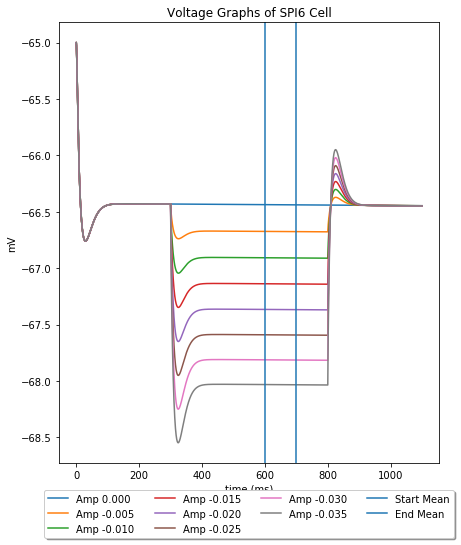

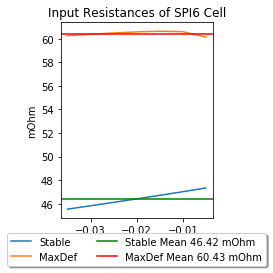

In [21]:
reload(layer_v_1)
cellmodule = layer_v_1
reload(generic)

inputresistances = generic.calculateInputResistance(cellmodule.SPI6, mult=-0.005, iterations=8, plot=True, delay=300, duration=500)

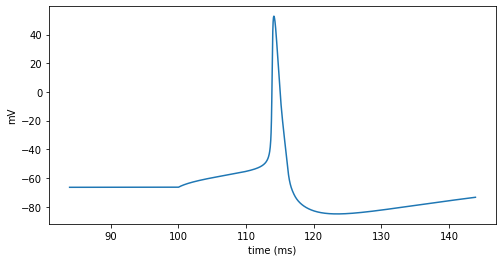

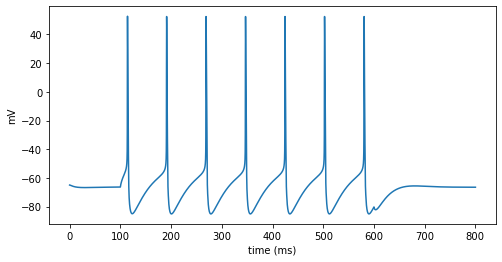

In [22]:
foundtrace = ap.findFirstApWithinMS(cellmodule.SPI6, ms= 15)
aptime = foundtrace["aps"][0]
aptrace = generic.isolateTime(foundtrace, aptime,30)

generic.plotTrace(aptrace)
generic.plotTrace(foundtrace)

In [55]:
def phasePlanePlot(tracein):
    copytrace = copy.copy(tracein)
    time = copytrace["t"].max() - copytrace["t"].min()
    hertz = copytrace["t"].shape[0]/time
    dT = 1/hertz
    
    print(hertz)
    print(dT)

    vgradient = np.gradient(copytrace["v"],copytrace["t"]) # Is this correct?
    
    fig = pyplot.figure(figsize=(20,12)) # Default figsize is (8,6)
    ax = pyplot.subplot(131)
    voltage = copytrace["v"] 
    ax.plot(voltage,vgradient)
    ax.set_xlim(-80, 80)
    ax.set_ylim(-50,500)
    return tracein
    
    

40.01667361400881
0.024989583333331476


{'v': array([-66.4618591 , -66.46180783, -66.46175663, ..., -73.446075  ,
        -73.43111773, -73.41616705]),
 't': array([ 83.925,  83.95 ,  83.975, ..., 143.85 , 143.875, 143.9  ]),
 'aps': array([113.925, 191.025, 268.775, 346.575, 424.425, 502.375, 580.35 ]),
 'cellbuilder': cells.layer_v_1.SPI6,
 'params': {'dur': 500, 'delay': 100, 'amp': 0.2}}

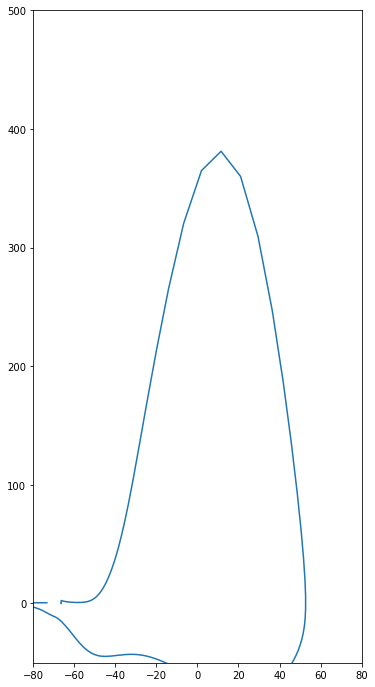

In [56]:
phasePlanePlot(aptrace)

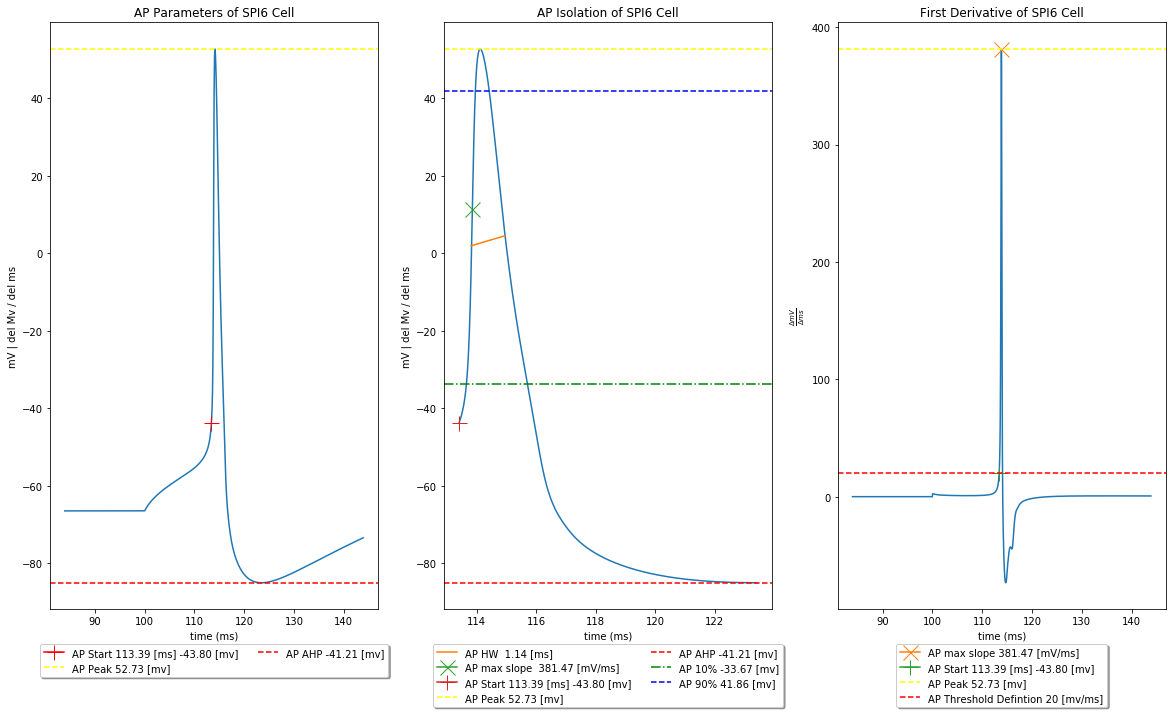

In [57]:
aptracewithparams = ap.calculateAPThresholdAndDerivative(aptrace)
ap.plotApParameters(aptracewithparams, deriv=True)

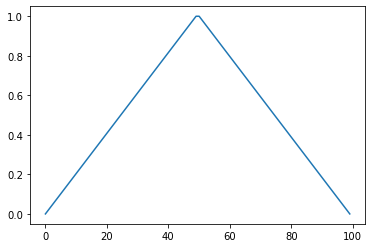

In [65]:
pyplot.plot(np.concatenate((np.linspace(0,1,50),np.linspace(1,0,50))))